## Housing Price Analysis

<h3>Table of Contents</h3>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Instructions">Instructions</a></li>
    <li><a href="#About-the-Dataset">About the Dataset</a></li>
    <li><a href="#Module-1:-Importing-Data-Sets">Module 1: Importing Data </a></li>
    <li><a href="#Module-2:-Data-Wrangling">Module 2: Data Wrangling</a> </li>
    <li><a href="#Module-3:-Exploratory-Data-Analysis">Module 3: Exploratory Data Analysis</a></li>
    <li><a href="#Module-4:-Model-Development">Module 4: Model Development</a></li>
    <li><a href="#Module-5:-Model-Evaluation-and-Refinement">Module 5: Model Evaluation and Refinement</a></li>
</a></li>


### About the data set

These are features related to housing price in Kings County

| Variable      | Description                                                                                                |
| ------------- | ---------------------------------------------------------------------------------------------------------|
| id            | A notation for a house                                                                                    |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [1]:
#importing required modules

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Loading data set followed by Data Wrangling

In [2]:
# reading the data-set

df = pd.read_csv('House_pricing')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# question 1
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Wrangling

In [5]:
df.drop('id', axis =1, inplace = True)

In [6]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
# finding missing values in dataframe and replacing them
df_column = df.columns
df_column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21600 non-null  float64
 3   bathrooms      21603 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [8]:
print(" number of nan values for the column bedroom",df['bedrooms'].isnull().sum())
print(" number of nan values for the column bathroom",df['bathrooms'].isnull().sum())

 number of nan values for the column bedroom 13
 number of nan values for the column bathroom 10


In [9]:
# replacing both features missing values with mean
mean_bed = df['bedrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bed, inplace = True)

In [10]:
mean_bath = df['bathrooms'].mean()
df['bathrooms'].replace(np.nan, mean_bath, inplace = True)

In [11]:
# all the missing values have been replaced
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

### Exploratory data analysis

In [12]:
# Question - 3
# Unique floor value counts
df_unique_floors = df['floors'].value_counts()
df_unique_floors.to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

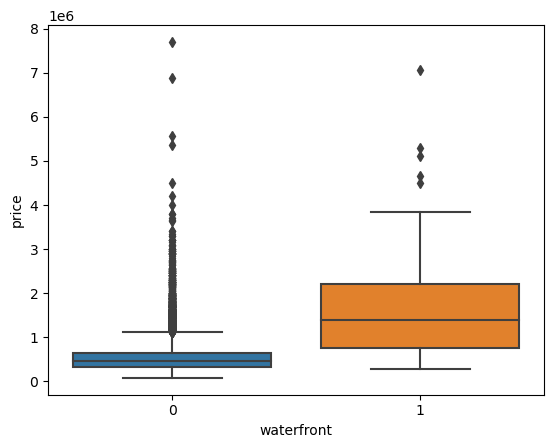

In [13]:
# Question-4 to check price outliers for the houses with waterfront
sns.boxplot(x='waterfront', y='price', data=df)

# here we can see we have many outliers for houses not having water-front

<Axes: xlabel='sqft_above', ylabel='price'>

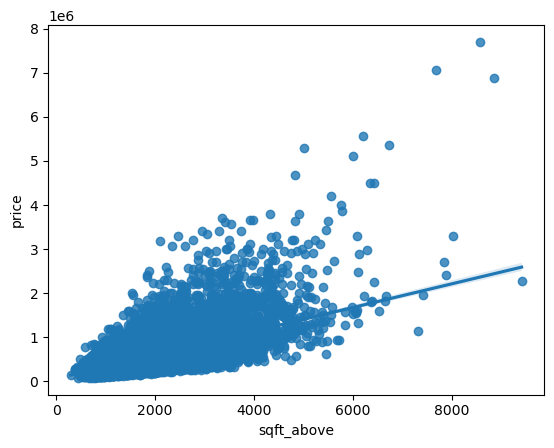

In [14]:
# Question-5
# using reg plot to determine relationship between sqft_above and price

sns.regplot(x='sqft_above', y ='price', data=df)

# as can be seen from the regplot it is having positive relationship but can not be explained by simple linear reg plot

In [15]:
# checking for correlation of price with each of the features

df.corr()['price'].sort_values()

C:\Users\AnandMukul\AppData\Local\Temp\ipykernel_29164\4054752632.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [16]:
# long/latitude being the most un correlated feature and can calculate the r^2
x= df[['long']]
y= df['price']
lm= LinearRegression()
lm.fit(x,y)
lm.score(x,y)

#very low r^2 score

0.00046769430149007363

In [17]:
# Question-6
# using linear regression to fit sqft_living which is having the highest correlation and calculating the r^2
x1= df[['sqft_living']]
y1 = df['price']
lm1 = LinearRegression()
lm1.fit(x1, y1)
lm1.score(x1, y1)

0.4928532179037931

In [18]:
# question-7
# fitting a linear regression with given features and calculating r^2
x2= df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
y2= df['price']

lm2= LinearRegression()
lm2.fit(x2, y2)
lm2.score(x2, y2)

0.6576951666037504

In [19]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [20]:
# Question- 8
pipe = Pipeline(Input)
pipe.fit(x2, y2)
pipe.score(x2, y2)

# further increase in r^2 using standerdization, and creating polynomial features

0.7513402173516526

### Model evaluation and refinement

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size= 0.15, random_state =1)


In [22]:
# Question - 9
rr = Ridge(alpha=0.1)
rr.fit(x_train, y_train)
rr.score(x_test, y_test)

0.6478759163939112

In [23]:
# Question - 10
poly = PolynomialFeatures(degree=2)
x_train_pr = poly.fit_transform(x_train)
x_test_pr = poly.fit_transform(x_test)

rr1 = Ridge(alpha = 0.1)
rr1.fit(x_train_pr, y_train)
rr1.score(x_test_pr, y_test)

# we see increase in r^2 after using polynomial transform with ridge regerssion

0.7002744255964455

### Exception Handling

In [24]:
a =1
    
try:
    b= int(input('Please input a number to divide by a' ))
    a= a/b
except ZeroDivisionError:
    print('the no you provided can not be divided')
except ValueError:
    print('you did not provide a number')
except:
    print('something went wrong')
else:
    print('after division the no is',a)

Please input a number to divide by a0
the no you provided can not be divided


### Practise for Exception handling

In [25]:
def safe_divide(num, den):
    try:
        d = num/den
    except ZeroDivisionError:
        print('Can not divide by zero! please enter a non zero number')
    else:
        print('division given two no are', d)

a = int(input('please enter the numerator'))
b = int(input('please enter the denominator'))
safe_divide(a,b)

please enter the numerator78
please enter the denominator0
Can not divide by zero! please enter a non zero number


In [26]:
import math
def root_calc(num):
    try:
        root = math.sqrt(num)
    except ValueError:
        print('please enter a positive integer or a float value')
    else:
        print('Square root of', num,'is', root)

a1 = int(input('Please enter the no to calculate the sqrt'))
root_calc(a1)

Please enter the no to calculate the sqrt-23
please enter a positive integer or a float value


In [27]:
## performing generic exception handling
def calc(num):
    try:
        res = num/(num-5)
        print(f"Result:{res}")
    except Exception as e:
        print('An error occured during calculation')
inpu = float(input('Enter the number '))
calc(inpu)

Enter the number d


ValueError: could not convert string to float: 'd'

### Class Creation

In [28]:
import matplotlib.pyplot as plt

# creating a class circle

class Circle(object):
    
    # constructor
    def __init__(self, radius=3, color='blue'):
        self.radius = radius
        self.color = color
        
    # Methods
    def add_radius(self,r):
        self.radius = self.radius + r
        return(self.radius)
    
    # Methods
    def drawCircle(self):
        plt.gca().add_patch(plt.Circle((0,0), radius = self.radius, fc=self.color))
        plt.axis('scaled')
        plt.show()

In [29]:
Redcircle = Circle(10, 'red')
Redcircle.radius
Redcircle.color

'red'

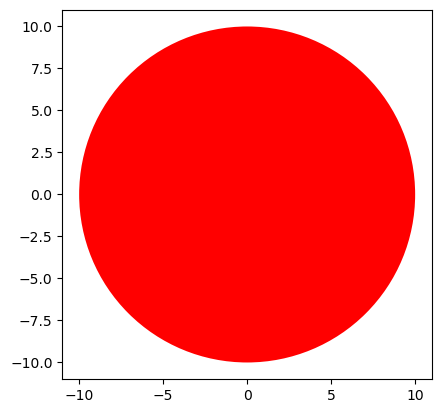

In [30]:
Redcircle.drawCircle()

In [31]:
Redcircle.add_radius(5)
Redcircle.radius

15

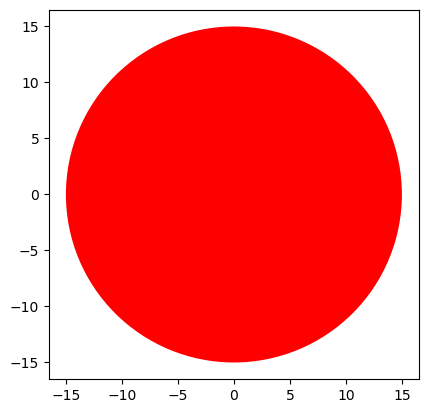

In [32]:
Redcircle.drawCircle()

In [44]:
### Similarly creating a class rectangle

class rectangle(object):
    
    # constructor
    
    def __init__(self, width=2, height=3, color='r'):
        self.width = width
        self.height =  height
        self.color = color
    
    # method
    
    def drawRectangle(self):
        plt.gca().add_patch(plt.Rectangle((0,0), self.width, self.height, fc= self.color))
        plt.axis('scaled')
        plt.show()

skinnyrect height is  3
skinnyrect width is  2


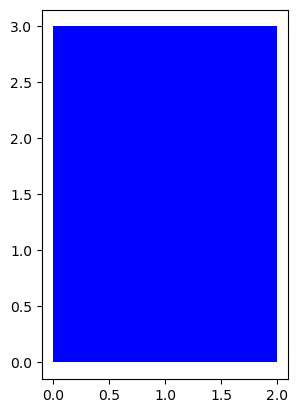

In [45]:
skinnyrect = rectangle(2,3, 'blue')
print('skinnyrect height is ', skinnyrect.height)
print('skinnyrect width is ', skinnyrect.width)
skinnyrect.drawRectangle()

height of new superskinny rect is 5 and widht is  2


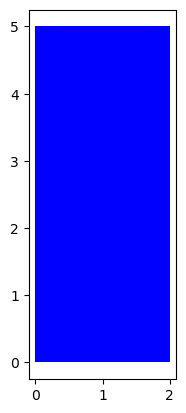

In [51]:
skinnyrect.height = 5
print('height of new superskinny rect is', skinnyrect.height,'and widht is ', skinnyrect.width)
skinnyrect.drawRectangle()

In [56]:
### creating a class cars

class cars(object):
    
    color = 'White'
    
    # constructor
    
    def __init__(self, max_speed = 120, mileage = 25):
        self.max_speed = max_speed
        self.mileage = mileage
    
    # method
    
    def seats(self, seat):
        self.seat = seat
        
    # method
    
    def features(self):
        print('Properties of the vehicle are...')
        print('Maximum speed of the car is', self.max_speed)
        print('Mileage of the given car is', self.mileage)
        print('Default color of the car is', self.color)
        print('No of seats in the car is', self.seat)
        

In [57]:
car1 = cars(200, 20)
car1.seats(2)
car1.features()

Properties of the vehicle are...
Maximum speed of the car is 200
Mileage of the given car is 20
Default color of the car is White
No of seats in the car is 2


In [59]:
car2 = cars(180, 25)
car2.seats(4)
car2.features()

Properties of the vehicle are...
Maximum speed of the car is 180
Mileage of the given car is 25
Default color of the car is White
No of seats in the car is 4
